# Features data analysis with Machine Learning and Visualization Techniques

**Daryna Yakymenko** <br> <br> 
31-07-2025

*Created for Biological Data Science Summer School, <br> Uzhhorod, Ukraine, July 19 - August 2, 2025*

In [166]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np
from sklearn.cluster import DBSCAN
from matplotlib.cm import get_cmap
import os

# Data loading 

In [55]:
df = pd.read_csv("./data/object_features.csv")

In [56]:
print(df.columns)

Index(['label', 'volume_vox', 'centroid-0', 'centroid-1', 'centroid-2',
       'mean_intensity', 'max_intensity', 'min_intensity', 'intensity_std',
       'entropy', 'sphericity', 'total_intensity',
       'background_corrected_intensity', 'volume_um3'],
      dtype='object')


Choose columns we need for the analysis: 

In [86]:
df.head()

,label,volume_um3,mean_intensity,max_intensity,intensity_std,entropy,cluster
0,1,0.385344,30.910314,200.0,35.957231,7.187043,2
1,2,0.520128,37.416113,160.0,33.796274,9.327431,2
2,3,0.404352,33.924145,150.0,31.508573,9.496843,2
3,4,0.516672,21.843645,99.0,16.391218,10.934842,2
4,5,0.267840,20.574194,90.0,20.136854,11.630000,2


In [87]:
df.describe()

,label,volume_um3,mean_intensity,max_intensity,intensity_std,entropy,cluster
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,96.755208,0.112066,8.536226,27.333333,5.476317,-19.863118,0.583333
std,55.979778,0.101656,5.366224,27.249542,5.460770,32.827017,0.649876
min,1.000000,0.005616,2.673954,8.000000,1.355134,-131.535877,0.000000
25%,48.750000,0.043632,5.347805,12.000000,2.359863,-40.241707,0.000000
50%,96.500000,0.082728,6.868092,18.000000,3.668431,-7.512142,0.000000
75%,144.250000,0.142236,9.603165,29.250000,5.938970,7.320617,1.000000
max,195.000000,0.580608,37.416113,200.000000,35.957231,13.993046,2.000000


In [72]:
df = df[['label', 'volume_um3', 'mean_intensity', 'max_intensity', 'intensity_std', 'entropy']] #'total_intensity', 'background_corrected_intensity'

# K-Means

In [157]:
# Features 
X = df[['volume_um3', 'mean_intensity', 'max_intensity', 'intensity_std', 'entropy']] #'total_intensity', 'background_corrected_intensity'
# Standardize
X_scaled = StandardScaler().fit_transform(X)

In [75]:
kmeans = KMeans(n_clusters=3, random_state=42)
df["cluster"] = kmeans.fit_predict(X_scaled)

C:\Users\evgen\anaconda3\envs\bioimage_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


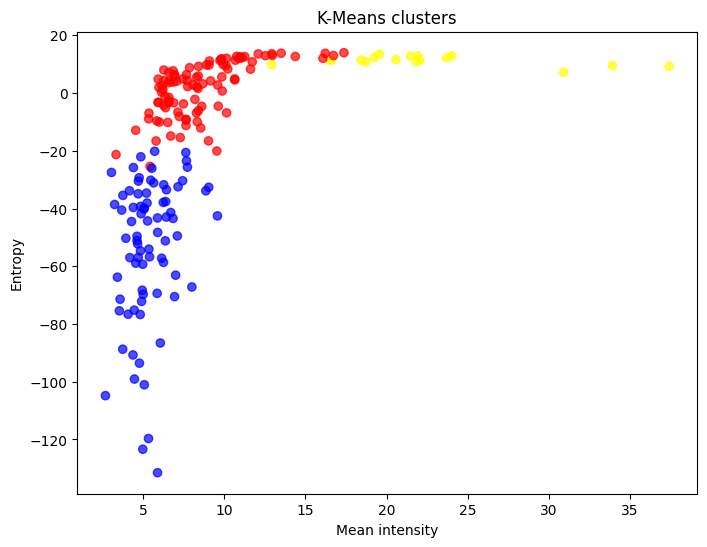

In [156]:
colors = ['red', 'blue', 'yellow']
cluster_colors = df['cluster'].map(lambda x: colors[x])
plt.figure(figsize=(8, 6))
plt.scatter(df["mean_intensity"], df["entropy"], c=cluster_colors, alpha=0.7)
plt.xlabel("Mean intensity")
plt.ylabel("Entropy")
plt.title("K-Means clusters")
plt.show()

### PCA 

In [81]:
y = df['cluster']
X = df[['volume_um3', 'mean_intensity', 'max_intensity', 'intensity_std', 'entropy']] #'total_intensity', 'background_corrected_intensity'

In [83]:
# Standarization 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [84]:
# PCA
pca = PCA(n_components=2)  # Redukcja do 2 wymiarów
X_pca = pca.fit_transform(X_scaled)

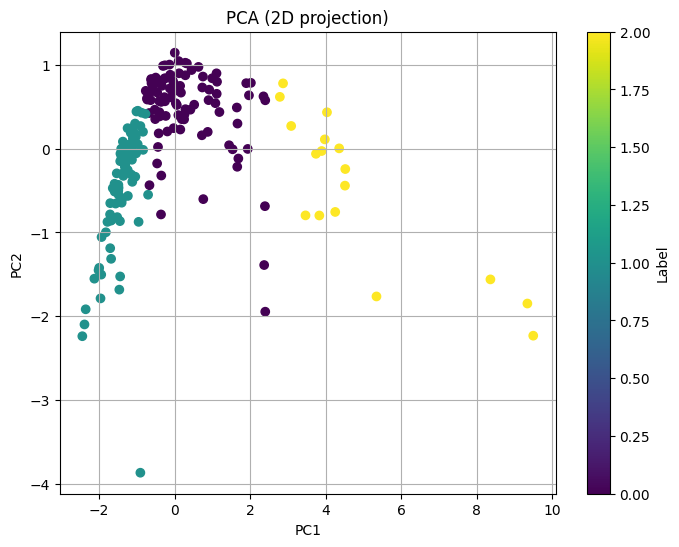

In [98]:
#Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA (2D projection)')
plt.colorbar(label='Label')
plt.grid(True)
plt.show()

In [101]:
## 'features' => list of features names 
features = X.columns

#influence vectors (loadings)
loadings = pca.components_.T

#the greatest influence on PC1 and PC2
pc1_top_features = features[np.argsort(np.abs(loadings[:, 0]))[::-1][:3]]  #top 3 for  PC1
pc2_top_features = features[np.argsort(np.abs(loadings[:, 1]))[::-1][:3]]  #top 3 for PC2

print(f"The greatest influence on PC1: {pc1_top_features}")
print(f"The greatest influence on PC2: {pc2_top_features}")

The greatest influence on PC1: Index(['intensity_std', 'max_intensity', 'mean_intensity'], dtype='object')
The greatest influence on PC2: Index(['entropy', 'volume_um3', 'max_intensity'], dtype='object')


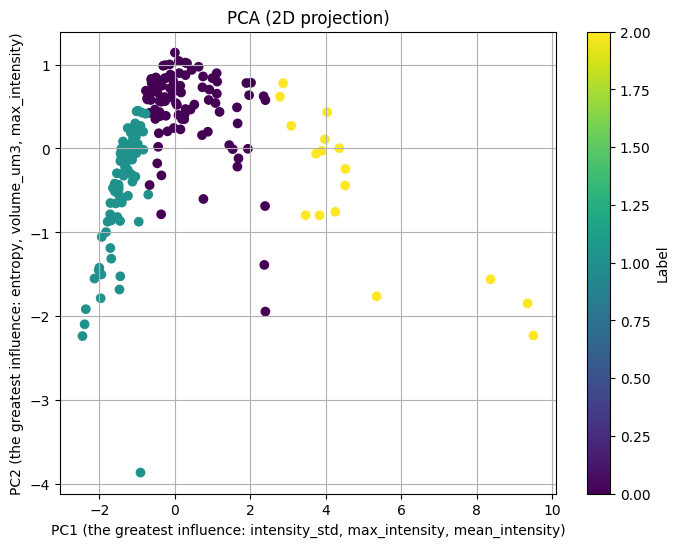

In [103]:
#Visualization
xlabel = f"PC1 (the greatest influence: {', '.join(pc1_top_features)})"
ylabel = f"PC2 (the greatest influence: {', '.join(pc2_top_features)})"

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['cluster'], cmap='viridis')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('PCA (2D projection)')
plt.colorbar(label='Label')
plt.grid(True)
plt.show()

## LDA

In [159]:
#LDA
lda = LDA(n_components=2)
#lda_train = lda.fit_transform(X_train, y_train)
X_lda = lda.fit_transform(X_scaled, y)

In [160]:
features = X.columns
loadings = lda.scalings_ 
ld1_top_features = features[np.argsort(np.abs(loadings[:, 0]))[::-1][:3]]
ld2_top_features = features[np.argsort(np.abs(loadings[:, 1]))[::-1][:3]]

print(f"The greatest influence on LD1: {ld1_top_features}")
print(f"The greatest influence on LD2: {ld2_top_features}")

The greatest influence on LD1: Index(['entropy', 'mean_intensity', 'max_intensity'], dtype='object')
The greatest influence on LD2: Index(['entropy', 'intensity_std', 'volume_um3'], dtype='object')


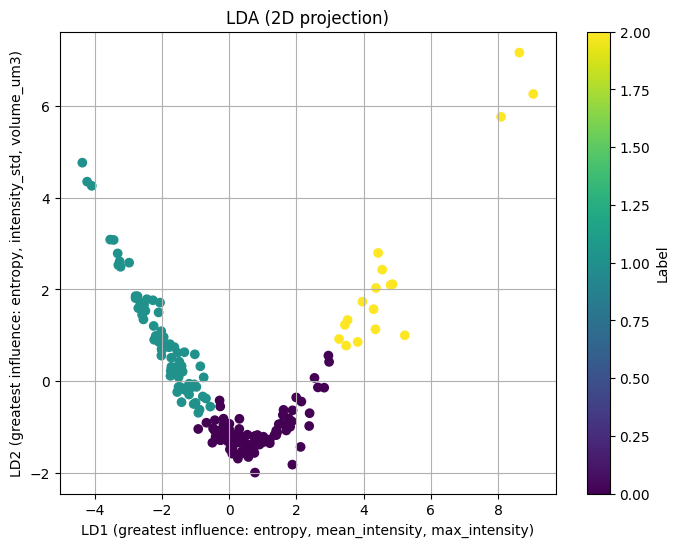

In [161]:
xlabel = f"LD1 (greatest influence: {', '.join(ld1_top_features)})"
ylabel = f"LD2 (greatest influence: {', '.join(ld2_top_features)})"

#Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title('LDA (2D projection)')
plt.colorbar(label='Label')
plt.grid(True)
plt.show()

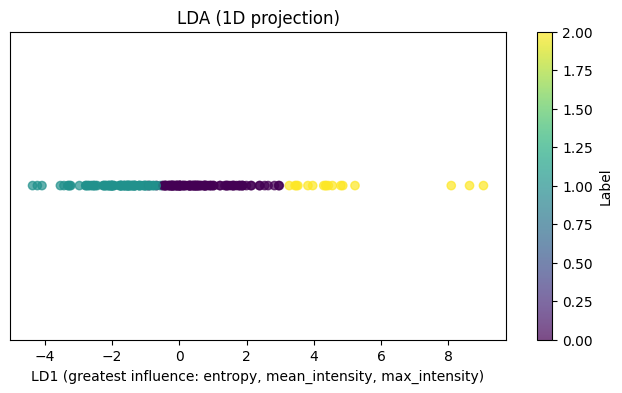

In [165]:
#1D LDA
lda = LDA(n_components=1)
X_lda_1d = lda.fit_transform(X_scaled, y)

features = X.columns
loadings = lda.scalings_  # shape (n_features, 1)
ld1_top_features = features[np.argsort(np.abs(loadings[:, 0]))[::-1][:3]]

xlabel = f"LD1 (greatest influence: {', '.join(ld1_top_features)})"

plt.figure(figsize=(8, 4))
y_positions = np.zeros_like(X_lda_1d)  
plt.scatter(X_lda_1d[:, 0], y_positions, c=y, cmap='viridis', alpha=0.7)
plt.xlabel(xlabel)
plt.yticks([])  # ukrywamy oś Y, bo jest nieistotna
plt.title('LDA (1D projection)')
plt.colorbar(label='Label')
#plt.grid(axis='x')
plt.show()

## K-Means visualization (based on the found principal compounds) 

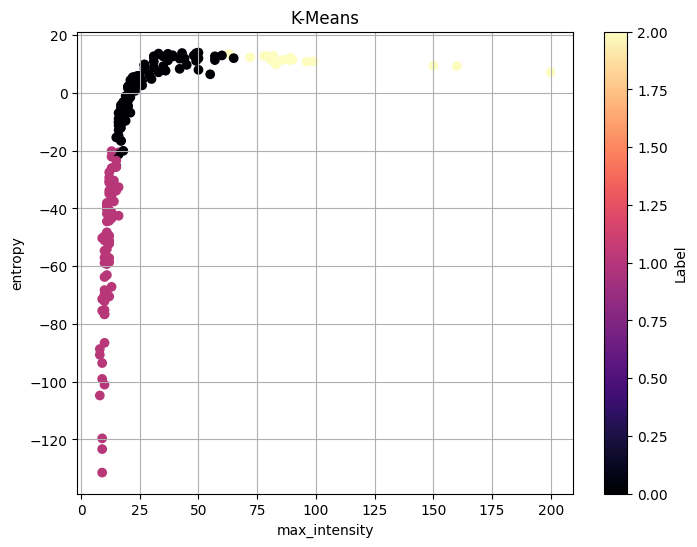

In [163]:
#Visualization
xlabel = "max_intensity"
ylabel = "entropy"

plt.figure(figsize=(8, 6))
plt.scatter(df["max_intensity"], df["entropy"], c=df['cluster'], cmap='magma')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("K-Means")
plt.colorbar(label='Label')
plt.grid(True)
plt.show()

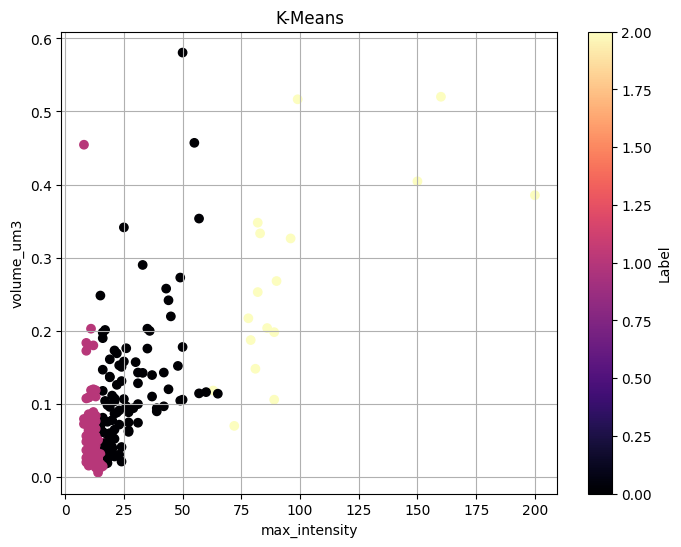

In [167]:
#Visualization
xlabel = "max_intensity"
ylabel = "volume_um3"

plt.figure(figsize=(8, 6))
plt.scatter(df["max_intensity"], df["volume_um3"], c=df['cluster'], cmap='magma')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("K-Means")
plt.colorbar(label='Label')
plt.grid(True)
plt.show()

### K-Means: screening

In [179]:
def run_kmeans_and_plot(df, cluster_range=(2, 6), save_dir="kmeans_plots"):
    #make sure directory exists
    os.makedirs(save_dir, exist_ok=True)

    for k in range(cluster_range[0], cluster_range[1]):
        #KMeans
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        df['cluster'] = kmeans.fit_predict(df[['max_intensity', 'entropy']])
        
        output_csv = os.path.join(save_dir, f"kmeans_k{k}.csv")
        df.to_csv(output_csv, index=False)
        print(f"Saved CSV to: {output_csv}")

        #Plot
        plt.figure(figsize=(8, 6))
        plt.scatter(df["max_intensity"], df["entropy"], c=df['cluster'], cmap='plasma')
        plt.xlabel("max_intensity")
        plt.ylabel("entropy")
        plt.title(f"K-Means (k={k})")
        plt.colorbar(label='Cluster')
        plt.grid(True)
        #Save the plot
        filename = os.path.join(save_dir, f'kmeans_k{k}_v1.png')
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.close()

        #Plot 2
        plt.figure(figsize=(8, 6))
        plt.scatter(df["max_intensity"], df["volume_um3"], c=df['cluster'], cmap='plasma')
        plt.xlabel("max_intensity")
        plt.ylabel("volume_um3")
        plt.title(f"K-Means (k={k})")
        plt.colorbar(label='Cluster')
        plt.grid(True)
        #Save the plot
        filename = os.path.join(save_dir, f'kmeans_k{k}_v2.png')
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        plt.close()

        print(f"Plots saved as: {filename}")

In [180]:
run_kmeans_and_plot(df, cluster_range=(2, 6), save_dir=r"./data/kmeans/SIII/Ch3") #name of the phase as the end of the directory 

C:\Users\evgen\anaconda3\envs\bioimage_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Saved CSV to: ./data/kmeans/SIII/Ch3\kmeans_k2.csv
Plots saved as: ./data/kmeans/SIII/Ch3\kmeans_k2_v2.png
Saved CSV to: ./data/kmeans/SIII/Ch3\kmeans_k3.csv


C:\Users\evgen\anaconda3\envs\bioimage_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Plots saved as: ./data/kmeans/SIII/Ch3\kmeans_k3_v2.png
Saved CSV to: ./data/kmeans/SIII/Ch3\kmeans_k4.csv


C:\Users\evgen\anaconda3\envs\bioimage_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Plots saved as: ./data/kmeans/SIII/Ch3\kmeans_k4_v2.png
Saved CSV to: ./data/kmeans/SIII/Ch3\kmeans_k5.csv


C:\Users\evgen\anaconda3\envs\bioimage_env\lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Plots saved as: ./data/kmeans/SIII/Ch3\kmeans_k5_v2.png


## DBSCAN 

In [124]:
X = df[['volume_um3', 'mean_intensity', 'max_intensity', 'intensity_std', 'entropy']] #'total_intensity', 'background_corrected_intensity'
# Standardize
X_scaled = StandardScaler().fit_transform(X)

In [142]:
db = DBSCAN(eps=0.22, min_samples=5)
db.fit(X_scaled)

,eps,0.22
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [145]:
df["cluster_db"] = db.fit_predict(X_scaled)

C:\Users\evgen\AppData\Local\Temp\ipykernel_10788\699232592.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('magma')


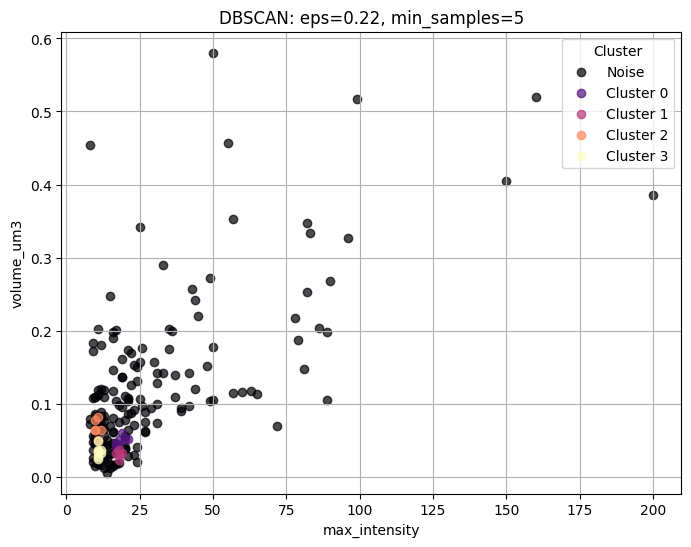

In [152]:
plt.figure(figsize=(8, 6))

xlabel = "max_intensity"
ylabel = "volume_um3"

clusters = np.unique(df['cluster_db'])
cmap = get_cmap('magma')
norm = plt.Normalize(vmin=min(clusters), vmax=max(clusters)) 

for cluster in clusters:
    cluster_data = df[df['cluster_db'] == cluster]
    color = cmap(norm(cluster)) 
    label = 'Noise' if cluster == -1 else f'Cluster {cluster}'
    plt.scatter(cluster_data["max_intensity"], cluster_data["volume_um3"],
                label=label, color=color, alpha=0.7)

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("DBSCAN: eps=0.22, min_samples=5")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

C:\Users\evgen\AppData\Local\Temp\ipykernel_10788\141814160.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = get_cmap('magma')


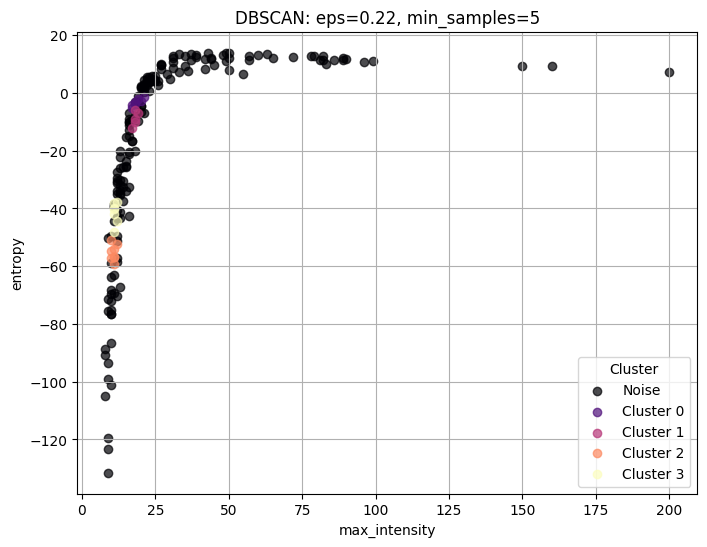

In [154]:
plt.figure(figsize=(8, 6))

xlabel = "max_intensity"
ylabel = "entropy"

clusters = np.unique(df['cluster_db'])
cmap = get_cmap('magma')
norm = plt.Normalize(vmin=min(clusters), vmax=max(clusters)) 

for cluster in clusters:
    cluster_data = df[df['cluster_db'] == cluster]
    color = cmap(norm(cluster)) 
    label = 'Noise' if cluster == -1 else f'Cluster {cluster}'
    plt.scatter(cluster_data["max_intensity"], cluster_data["entropy"],
                label=label, color=color, alpha=0.7)

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.title("DBSCAN: eps=0.22, min_samples=5")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()